# **<font style = "color:rgb(58, 45, 247)"> Train-Test Data Spliting</font>**

To create a balanced training and testing dataset with equal representation from each activity class (walking, reading, playing), follow these steps:

1. **Load Each Dataset**: Read `walking.csv`, `reading.csv`, and `playing.csv` from `full_dataset_combined`.
2. **Combine Datasets**: Concatenate the three files into a single DataFrame.
3. **Shuffle and Split the Data**: Randomly shuffle the data and split it into training and testing sets.
4. **Ensure Balanced Classes**: Take equal portions from each class for both training and testing sets.
5. **Save the Datasets**: Save the training and testing datasets as `train.csv` and `test.csv`.

Here’s the Python script for the above steps:

### Explanation of the Script

1. **Loading and Labeling Data**: Each file (`walking.csv`, `reading.csv`, `playing.csv`) is loaded with a `Result` column indicating its activity label.
2. **Data Splitting**: Uses `train_test_split` with an 80-20 split for each activity class. This ensures equal representation across classes in both training and testing datasets.
3. **Concatenating and Saving**: The training and testing data for all classes are combined and saved to `train.csv` and `test.csv` in the `dataset_split` directory.



In [ ]:
import matplotlib.pyplot as plt

"""
Uncomment this cell to run `create_train_test_data.py` from this notebook.
Please note it will create a new folders with process datasets
"""
# import subprocess
# import sys
# # Run the script and capture output in the notebook
# create_train_test_data_result = subprocess.run(
#     [sys.executable, 'create_train_test_data.py'],
#     stdout=subprocess.PIPE,
#     stderr=subprocess.PIPE,
#     text=True
# )
# 
# # Print both stdout and stderr
# print(create_train_test_data.stdout)
# print(create_train_test_data.stderr)

In [3]:
# Import package
import os
import pandas as pd
from sklearn.model_selection import train_test_split
from data_path import FEATURE_FILE_PATH, DATA_SPLIT_PATH

In [ ]:

# Directory containing the combined files
input_folder = FEATURE_FILE_PATH
output_folder = DATA_SPLIT_PATH
os.makedirs(output_folder, exist_ok=True)

# Load each activity file with Result column as Y indicator
activity_files = {
    'walking': 1,
    'reading': 2,
    'playing': 3
}

# List to store all data for concatenation
all_data = []

# Load each file and append to all_data
for activity, label in activity_files.items():
    file_path = os.path.join(input_folder, f"{activity}.csv")
    if os.path.exists(file_path):
        data = pd.read_csv(file_path)
        data['Result'] = label  # Set the Result column for classification target
        all_data.append(data)

# Concatenate all data into a single DataFrame
combined_data = pd.concat(all_data, ignore_index=True)

# Split each class separately to ensure balanced classes in train and test sets
train_data = []
test_data = []

for label in activity_files.values():
    class_data = combined_data[combined_data['Result'] == label]
    train, test = train_test_split(class_data, test_size=0.2, random_state=42)
    train_data.append(train)
    test_data.append(test)

# Concatenate all classes to form the final train and test datasets
train_data = pd.concat(train_data, ignore_index=True)
test_data = pd.concat(test_data, ignore_index=True)

# Save train and test datasets
train_data.to_csv(os.path.join(output_folder, 'train.csv'), index=False)
test_data.to_csv(os.path.join(output_folder, 'test.csv'), index=False)


In [6]:
# Data visualization
train_data = pd.read_csv(os.path.join(DATA_SPLIT_PATH, 'train.csv'))
test_data = pd.read_csv(os.path.join(DATA_SPLIT_PATH, 'test.csv'))

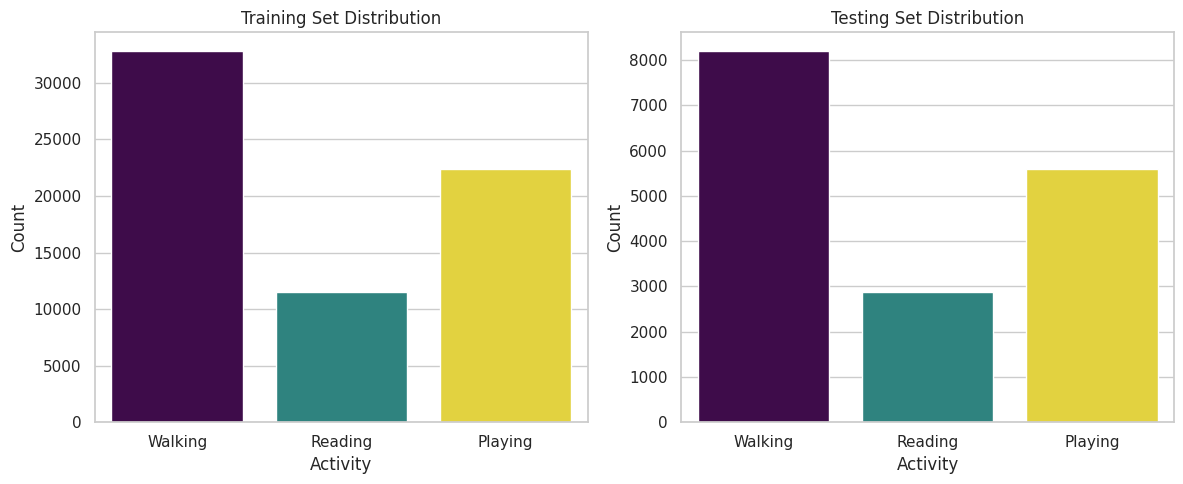

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
# Map activity labels for better readability in the plots
activity_map = {1: 'Walking', 2: 'Reading', 3: 'Playing'}
train_data['Activity'] = train_data['Result'].map(activity_map)
test_data['Activity'] = test_data['Result'].map(activity_map)

# Set up the plotting style
sns.set_theme(style="whitegrid")

# Plot the distribution for the training set
plt.figure(figsize=(12, 5))

# Training set distribution
plt.subplot(1, 2, 1)
sns.countplot(data=train_data, x='Activity', palette='viridis', hue='Result', legend=False)
plt.title('Training Set Distribution')
plt.xlabel('Activity')
plt.ylabel('Count')

# Testing set distribution
plt.subplot(1, 2, 2)
sns.countplot(data=test_data, x='Activity', palette='viridis', hue='Result', legend=False)
plt.title('Testing Set Distribution')
plt.xlabel('Activity')
plt.ylabel('Count')

# Show the plot
plt.tight_layout()
plt.show()
